# 📊 Assignment: Predicting 2024 Data Science Salaries Using Linear Regression

**Course**: Data Analytics with Python  
**Instructor**: Leonard Andrew Mesiera  
**Due Date**: October 22, 2025

## 🎯 Learning Objectives
By the end of this assignment, you will be able to:
- Load and explore a real-world dataset
- Prepare data for linear regression (feature engineering, encoding, cleaning)
- Train a simple linear regression model using `scikit-learn`
- Evaluate your model using metrics like R² and interpret results
- Make predictions for future years (e.g., 2024)

## 📁 Dataset
You are given the file: `Data Science Salary 2021 to 2023.csv`

This dataset contains salary information for data professionals from 2021 to 2023, including:
- `work_year`: The year the salary was recorded
- `experience_level`: EN (Entry), MI (Mid), SE (Senior), EX (Executive)
- `job_title`: e.g., Data Scientist, Data Analyst, etc.
- `salary_in_usd`: Salary converted to USD (this is your target variable)
- Other useful columns: `employment_type`, `company_location`, `company_size`

Your goal: **Predict average salaries for 2024** using linear regression.

## 🛠️ Part 1: Setup and Data Loading

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('datasets\\Data Science Salary 2021 to 2023.csv')

# Display first few rows
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L


In [3]:
# Check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3761 non-null   int64 
 1   experience_level  3761 non-null   object
 2   employment_type   3761 non-null   object
 3   job_title         3761 non-null   object
 4   salary            3761 non-null   int64 
 5   salary_currency   3761 non-null   object
 6   salary_in_usd     3761 non-null   int64 
 7   company_location  3761 non-null   object
 8   company_size      3761 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.6+ KB


## 🔍 Part 2: Exploratory Data Analysis (EDA)

Answer the following in markdown cells below (or as code comments):

1. How many unique job titles are there?
2. What is the average salary (`salary_in_usd`) per `work_year`?
3. Create a bar plot showing average salary by `experience_level`.

> 💡 Tip: Use `groupby()` and `mean()`.

<h2>1.) How many unique job titles are there?</h2>

In [6]:
df['job_title'].nunique()

93

In [5]:
df['job_title'].unique()

array(['Applied Scientist', 'Data Quality Analyst',
       'Compliance Data Analyst', 'Machine Learning Engineer',
       'Research Scientist', 'Data Engineer', 'Data Analyst',
       'Data Scientist', 'BI Data Engineer', 'Research Engineer',
       'Business Data Analyst', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Scientist', 'AI Programmer',
       'AI Developer', 'Computer Vision Engineer', 'BI Developer',
       'Big Data Engineer', 'Deep Learning Engineer', 'Head of Data',
       'Analytics Engineer', 'Data Architect', 'Director of Data Science',
       'Head of Data Science', 'Data Analytics Manager', 'ML Engineer',
       'Applied Machine Learning Engineer', 'Applied Data Scientist',
       'ETL Engineer', 'Data Specialist', 'Lead Data Analyst',
       'Data Manager', 'Machine Learning Scientist', 'MLOps Engineer',
       'Financial Data Analyst', 'Software Data Engineer',
       'Data Science Manager', 'Data Science Consultant',
       'Machine Learning 

<h2>2.) What is the average salary (salary_in_usd) per work_year?</h2>

In [9]:
df.groupby('work_year')['salary_in_usd'].mean().reset_index()

,work_year,salary_in_usd
0,2020,92302.631579
1,2021,94087.208696
2,2022,133379.510804
3,2023,148954.558413


<h2>3.) Create a bar plot showing average salary by experience_level.</h2>

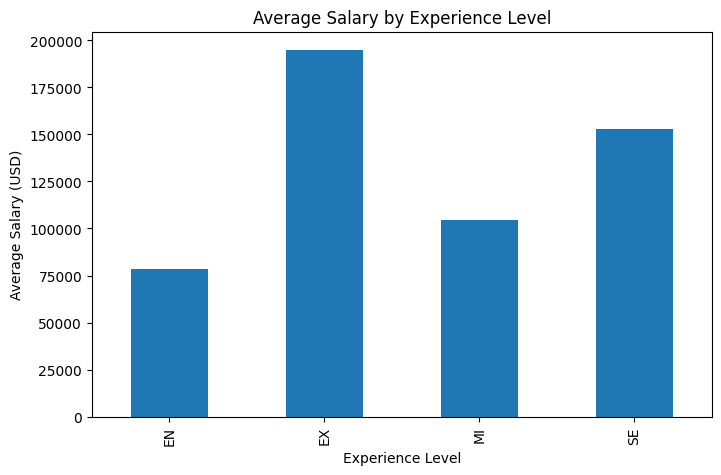

In [10]:
avg_salary_exp = df.groupby('experience_level')['salary_in_usd'].mean()

plt.figure(figsize=(8,5))
avg_salary_exp.plot(kind='bar')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary by Experience Level')
plt.show()

## 🧹 Part 3: Data Preprocessing for Linear Regression

We will predict `salary_in_usd` using **only numerical or encoded categorical features**.

### Steps:
1. Select features: `work_year`, `experience_level`, and optionally `job_title` (you decide!)
2. Encode categorical variables (`experience_level`) using `LabelEncoder` or `pd.get_dummies()`
3. Define `X` (features) and `y` (target = `salary_in_usd`)

> ⚠️ **Important**: Do NOT include `salary`, `salary_currency`, or `salary_in_usd` in your features!

In [11]:
# Example: Encode experience_level
le = LabelEncoder()
df['experience_level_encoded'] = le.fit_transform(df['experience_level'])

# Choose your features
features = ['work_year', 'experience_level_encoded']
X = df[features]
y = df['salary_in_usd']

# Optional: Add more features like job_title (try it!)
# But remember: too many categories can hurt performance

X.head()

,work_year,experience_level_encoded
0,2023,0
1,2023,0
2,2023,0
3,2023,0
4,2023,0


## 📈 Part 4: Train a Linear Regression Model

In [12]:
# Split data into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

R² Score: 0.15
RMSE: 59164.82


## 🔮 Part 5: Predict 2024 Salaries

Now, create a small DataFrame for **2024** with different experience levels and predict their salaries.

Use the same encoding as before!

In [13]:
# Map experience levels to encoded values (check your LabelEncoder!)
# Example: EN=0, MI=1, SE=2, EX=3 (confirm with `le.classes_`)

future_data = pd.DataFrame({
    'work_year': [2024, 2024, 2024, 2024],
    'experience_level_encoded': [0, 1, 2, 3]  # EN, MI, SE, EX
})

# Predict
predicted_salaries = model.predict(future_data)

# Display results
results = pd.DataFrame({
    'Experience Level': ['Entry', 'Mid', 'Senior', 'Executive'],
    'Predicted 2024 Salary (USD)': predicted_salaries
})
results

,Experience Level,Predicted 2024 Salary (USD)
0,Entry,111694.914909
1,Mid,131967.434578
2,Senior,152239.954247
3,Executive,172512.473916


## 📝 Part 6: Reflection (Answer in a Markdown Cell)

1. Does your model make reasonable predictions? Why or why not?
2. What are the limitations of using only `work_year` and `experience_level`?
3. How could you improve this model? (Think: more features, better encoding, etc.)
4. Why is **R² not enough** to trust your predictions?

> 💡 Remember: Linear regression assumes a **linear trend**—but real salaries may grow non-linearly!

<h3>1.) Does your model make reasonable predictions? Why or why not?</h3>

<p>Yes, it makes predictions that make sense because it looks at past patterns and the other variables we included. But it’s not super accurate since it doesn’t know other important things like the job role, company, or location. So, the results are mostly just rough estimates.</p>

<h3>2.) What are the limitations of using only work_year and experience_level?</h3>

<p>The limitation of relying only on work_year and experience_level is that it doesn’t capture the full picture. These features don’t account for variations in job roles, company types, or the cost of living across different countries. As a result, the model might overlook other important factors that explain why people with the same experience can have very different salaries.</p>

<h3>3.) How could you improve this model? (Think: more features, better encoding, etc.)</h3>

<p>I could make the model better by including additional features like job title, company size, location, and employment type. I would also apply improved encoding methods, such as one-hot encoding for categorical data, and consider using non-linear models like Random Forest or Gradient Boosting. These improvements would help the model capture more complex salary patterns and provide more accurate predictions.</p>

<h3>4.) Why is R² not enough to trust your predictions?</h3>

<p>R² by itself isn’t enough to trust the predictions because it only measures how well the model fits the data, not how accurate it is on new data. A high R² can sometimes occur even if the model is overfitting, and a low R² doesn’t necessarily mean the model is poor. It’s better to also consider other metrics like RMSE or MAE and test the model on new data. Since salaries don’t always grow in a straight line and can increase non-linearly, relying solely on R² can be misleading.</p>

## 📤 Submission Instructions

- Save this notebook as: `LastName_FirstName_SalaryPrediction.ipynb`
- Ensure all code runs without errors
- Include your answers to the reflection questions
- Submit via [your LMS/email/etc.]

Good luck! 🚀